In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("./data/HDI.csv")
df2 = pd.read_csv("./data/master.csv")

In [3]:
hdi = df1.copy()
suicide = df2.copy()

In [4]:
hdi = hdi.drop(columns=['Code'])
suicide = suicide.drop(columns=['country-year'])

In [5]:
hdi.columns = [col.lower().strip().replace(' ', '_') for col in hdi.columns]

In [6]:
suicide.columns = [col.lower().strip().replace(' ', '_') for col in suicide.columns]

In [7]:
hdi.columns

Index(['entity', 'year', 'human_development_index'], dtype='object')

In [8]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'hdi_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

In [9]:
hdi = hdi.rename(columns={'human_development_index':'hdi', 'entity':'country'})

In [10]:
suicide = suicide.rename(columns={'entity':'country', 'hdi_for_year':'hdi'})

In [11]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['country', 'year', 'hdi'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'hdi', 'gdp_for_year_($)', 'gdp_per_capita_($)',
       'generation'],
      dtype='object')


In [12]:
suicide.drop(columns=['hdi'], inplace=True)

In [13]:
df_inner = pd.merge(suicide, hdi, how='inner', on=['country', 'year'])

In [14]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21906 entries, 0 to 21905
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             21906 non-null  object 
 1   year                21906 non-null  int64  
 2   sex                 21906 non-null  object 
 3   age                 21906 non-null  object 
 4   suicides_no         21906 non-null  int64  
 5   population          21906 non-null  int64  
 6   suicides/100k_pop   21906 non-null  float64
 7   gdp_for_year_($)    21906 non-null  object 
 8   gdp_per_capita_($)  21906 non-null  int64  
 9   generation          21906 non-null  object 
 10  hdi                 21906 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ MB


In [106]:
df = df.rename(columns={'gdp_for_year_($)': 'gdp_for_year', 'gdp_per_capita_($)': 'gdp_per_capita'})

In [107]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'hdi'],
      dtype='object')

In [15]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Saint Lucia', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain'

In [18]:
original_countries = suicide.country.unique()
hdi_countries = hdi.country.unique()

In [23]:
unmatched_values = set(original_countries) - set(hdi_countries) | set(hdi_countries) - set(original_countries)

In [30]:
#list(unmatched_values)

In [50]:
len(df_inner.country.unique())

90

In [52]:
len(suicide.country.unique())

101

In [44]:
hdi

,country,year,hdi
0,Afghanistan,1990,0.273
1,Afghanistan,1991,0.279
2,Afghanistan,1992,0.287
3,Afghanistan,1993,0.297
4,Afghanistan,1994,0.292
...,...,...,...
5918,Zimbabwe,2017,0.594
5919,Zimbabwe,2018,0.602
5920,Zimbabwe,2019,0.601
5921,Zimbabwe,2020,0.600


In [45]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k_pop   27820 non-null  float64
 7   gdp_for_year_($)    27820 non-null  object 
 8   gdp_per_capita_($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [53]:
df_left = pd.merge(suicide, hdi, how='left', on=['country', 'year'])

In [69]:
country_year_nan = df_left[df_left.isna().any(axis=1)][['country', 'year']]

array([  nan, 0.576, 0.585, 0.595, 0.613, 0.619, 0.628, 0.635, 0.64 ,
       0.646, 0.653, 0.676, 0.687, 0.697, 0.706, 0.712, 0.724, 0.727,
       0.73 , 0.737, 0.743, 0.746, 0.747, 0.778, 0.781, 0.785])

In [78]:
import pandas as pd

# create a sample DataFrame
data = {'Country': ['USA', 'USA', 'Canada', 'Canada', 'Canada'],
        'Year': [2015, 2016, 2015, 2016, 2017],
        'Value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# group the DataFrame by 'Country' and apply the mean and count functions to each group
grouped = df.groupby('Country').agg({'Value': ['mean', 'count']})

# show the resulting DataFrame
print(grouped)

        Value      
         mean count
Country            
Canada   40.0     3
USA      15.0     2


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (10).

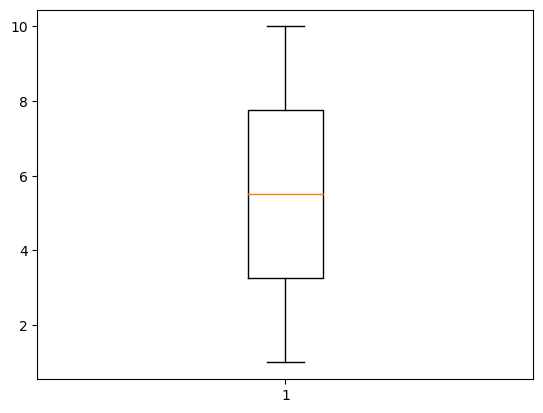

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({'category': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                     'value': [10, 12, 15, 20, 25, 30, 35, 40, 45, 50]})

# Assign numerical values to categories based on rank
category_values = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10}
data['category_value'] = data['category'].map(category_values)

# Create a boxplot
fig, ax = plt.subplots()
ax.boxplot(data['category_value'])

# Set x-axis tick labels to original categories
ax.set_xticklabels(category_values.keys())

# Show the plot
plt.show()